# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Palmer Penguins dataset from seaborn
import seaborn as sns
penguins = sns.load_dataset("penguins")

# Display the first few rows of the dataset
print(penguins.head())

# Drop rows with missing values (optional, depending on your analysis)
penguins = penguins.dropna()

# Dummify categorical variables
penguins_dummified = pd.get_dummies(penguins, drop_first=True)

# Display the first few rows of the dummified dataset
print(penguins_dummified.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0            39.1           18.7              181.0       3750.0   
1            39.5           17.4              186.0       3800.0   
2            40.3           18.0              195.0       3250.0   
4            36.7           19.3              193.0       3450.0   
5            39.3           20.6              190.0       3650.0 

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

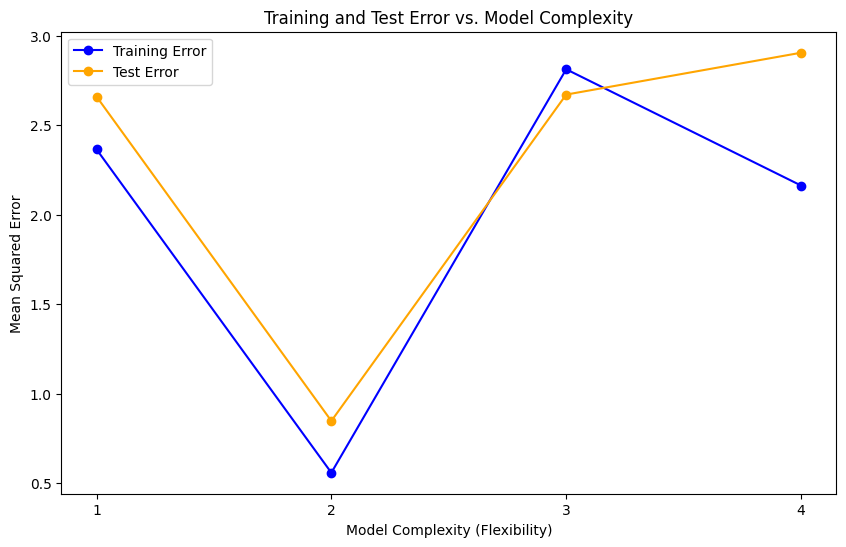

The best model is Model 2 with the lowest test error of 0.85


In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and prepare the dataset
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()  # Drop missing values for simplicity

# Separate target and predictors
y = penguins["bill_depth_mm"]
categorical_cols = penguins.select_dtypes(include=["object"]).columns
numerical_cols = penguins.select_dtypes(exclude=["object"]).columns.drop("bill_depth_mm")

# One-hot encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(penguins[categorical_cols])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))

# Combine the numerical and encoded categorical columns
X_full = pd.concat([penguins[numerical_cols].reset_index(drop=True), encoded_categorical_df], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Define four sets of predictor variables for the models (representing different levels of complexity)
model_predictors = [
    ["bill_length_mm", "flipper_length_mm", "body_mass_g"],  # Model 1: Numerical features only (least complex)
    ["bill_length_mm", "flipper_length_mm", "body_mass_g"] + list(encoded_categorical_df.columns),  # Model 2: All features
    ["bill_length_mm", "species_Adelie", "species_Chinstrap"],  # Model 3: Specific numerical and encoded species
    ["bill_length_mm", "body_mass_g", "island_Dream", "island_Torgersen"],  # Model 4: A mix of numerical and encoded categorical
]

# Initialize arrays to store errors
train_errors = []
test_errors = []

# Train and evaluate each model
for predictors in model_predictors:
    # Check that predictors exist in X_train (to avoid KeyErrors)
    predictors = [p for p in predictors if p in X_train.columns]

    # Create training and test subsets for the current model's predictors
    X_train_model = X_train[predictors]
    X_test_model = X_test[predictors]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train_model, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train_model)
    y_test_pred = model.predict(X_test_model)

    # Calculate and store mean squared errors
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot the training and test errors for each model as a function of model complexity
plt.figure(figsize=(10, 6))
complexity = range(1, 5)  # Representing model numbers as complexity levels
plt.plot(complexity, train_errors, marker='o', label='Training Error', color='blue')
plt.plot(complexity, test_errors, marker='o', label='Test Error', color='orange')
plt.xlabel('Model Complexity (Flexibility)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs. Model Complexity')
plt.legend()
plt.xticks(complexity)
plt.show()

# Determine the best model based on test error
best_model_index = test_errors.index(min(test_errors)) + 1
print(f"The best model is Model {best_model_index} with the lowest test error of {min(test_errors):.2f}")
